In [40]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("../data/DataWithLocationCleaned.zip")

Let's first show the data with the position added which has previously been cleaned

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
position             object
dtype: object

In [5]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,"(48.905266, -95.314404)"


**Now let's start some EDA !**

We will change the date format and add a month column so that we can explore data more precisely

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
month_mapper = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'
               ,7:'Jul', 8:'Aug', 9:'Sep' ,10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Date'].apply(lambda x : x.month).map(month_mapper)
del month_mapper

In [7]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,position,Year,Month
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,"(48.905266, -95.314404)",2019,Jun
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,"(48.905266, -95.314404)",2019,Jun
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,"(48.905266, -95.314404)",2019,Jun
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,"(48.905266, -95.314404)",2019,Jun
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,"(48.905266, -95.314404)",2019,Jun


Now let's see what are the most used vehicles overall:

                        Measure       Value
0   Personal Vehicle Passengers  5504073464
1             Personal Vehicles  2584776249
2                   Pedestrians  1056699751
3                        Trucks   256762423
4         Truck Containers Full   179543288
5                Bus Passengers   143388212
6        Truck Containers Empty    64852271
7          Rail Containers Full    38891558
8         Rail Containers Empty    21477185
9                         Buses     8604318
10             Train Passengers     6287351
11                       Trains      912969


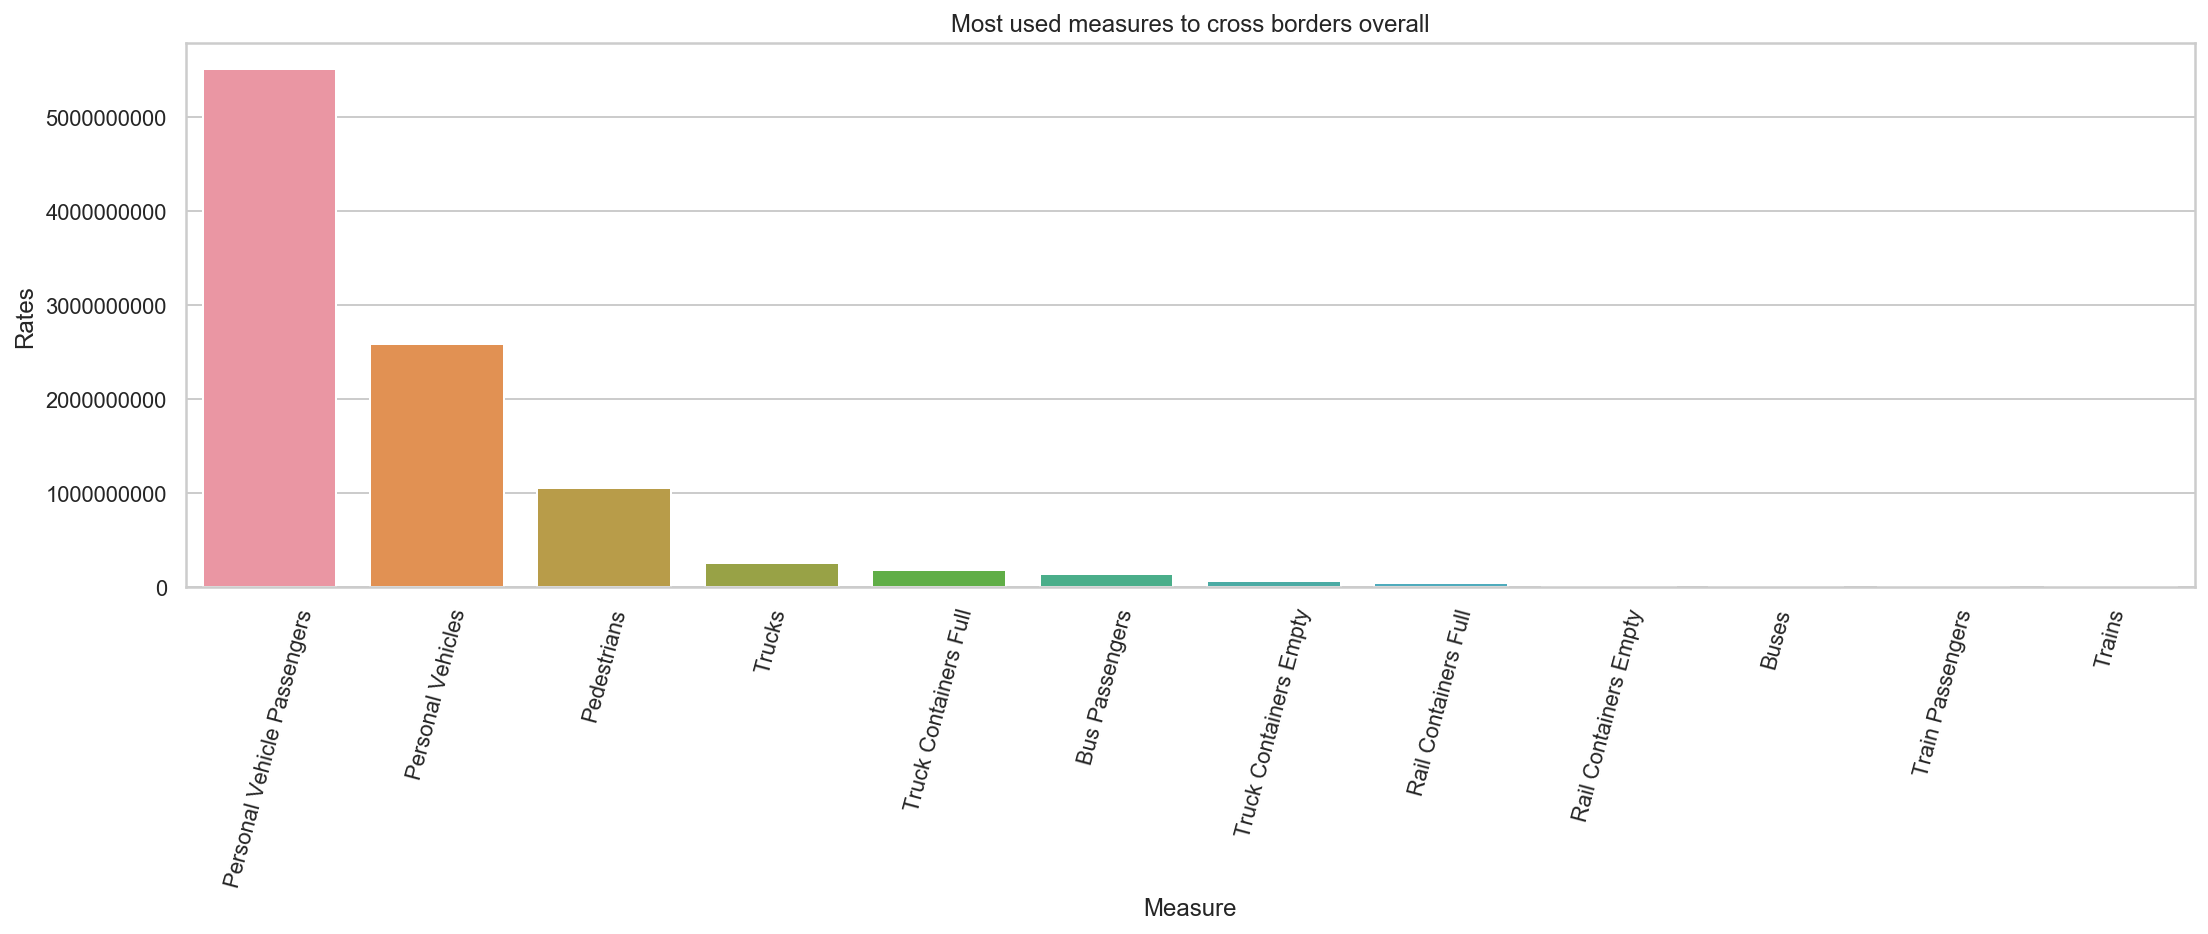

In [42]:
temp = pd.DataFrame(df.groupby(by='Measure')['Value'].sum().sort_values(ascending=False)).reset_index()
print(temp)

plt.figure(figsize=(18,5))
sns.barplot(x=temp['Measure'],y=temp['Value'])
plt.title('Most used measures to cross borders overall')
plt.ylabel('Rates')
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis='y')

del temp